<a href="hhttps://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/L2_Colab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2.3 Time and frequency domain calculations and analysis using ADXL345 data



For this section of Lab 2, have ready in hand all CSV files (highest rate outcome of 3200 Hz) from each activity: no fan, fan in normal condition, and  fan in anomalous condition.

For this portion of the lab, you will no longer need to use the Raspberry PI as you already have the data collected.

**You will run all your code using this Colab notebook**

## 3.1 Signal Processing and plotting data from: Fan off data

### Reading a CSV file and plotting data

In this part, we will read the saved CSV file generated in Lab 2.2 and then plot the data. A sample code structure is given below. It includes frequency domain transformations as well. However, the plotting part of the FFT signals is incomplete. You should finish the incomplete part.

Please note that you must change the ‘filename’ variable according to the CSV file you saved in the previous part. By modifying and adding lines, try to calculate time domain features from each axis data in Table 1 in the Prelab 2.2, such as mean, standard deviation, root mean square, and so on.






Import essential libraries:

In [1]:
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns
import csv

The following code allows you to upload the data stored in a csv file to this Colab notebook.

In [2]:
#This code allows you to upload a file from your local drive
from google.colab import files
uploaded = files.upload()
#If you will work with excel, please save your file with a .CSV format
#Check the output file name below. You will use that file name in the next block.

Saving 20260204_160641_lab2_fan_off.csv to 20260204_160641_lab2_fan_off.csv


The next coding block extracts information from the csv file, and saves it through arrays.
The FFT fourier code is incomplete (a_y, and a_z are not coded). Please finish coding it and plot it by uncommenting the plot code lines.

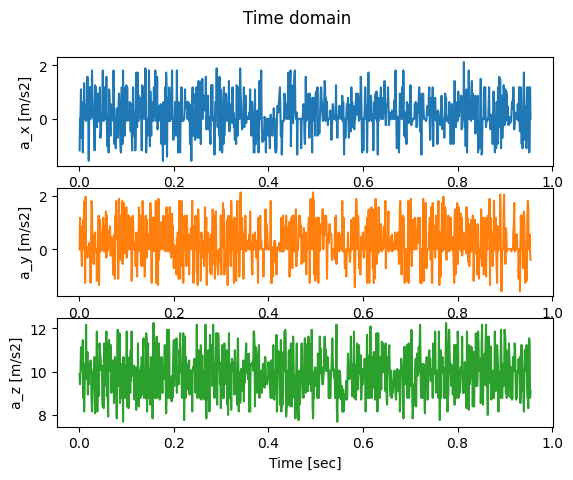

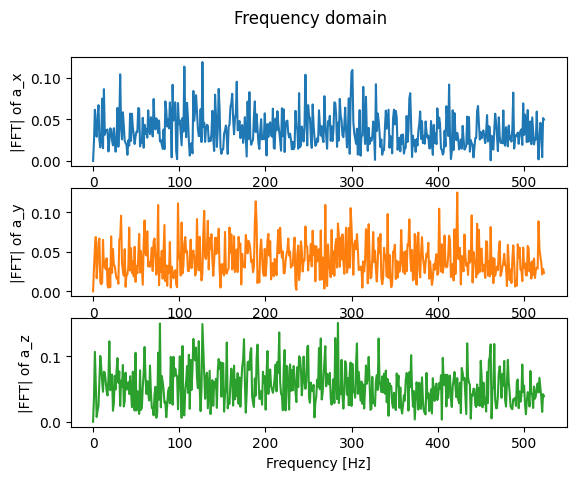

In [2]:
from pandas.core.internals.construction import dict_to_mgr

filename1 = '20260204_160641_lab2_fan_off.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations
#Declaring arrays
dt = [] # sampling period list, dt
t = [] # time list, t
a_x = [] # x-axis acceleration list, a_x
a_y = [] # y-axis acceleration list, a_y
a_z = [] # z-axis acceleration list, a_z

# Reading a CSV file and convert rows as data

with open(filename1, 'r') as f:
    rows = csv.reader(f, delimiter = ',')
    header = next(rows)
    for row in rows:
        dt.append(float(row[0]))
        t.append(float(row[1]))
        a_x.append(float(row[2]))
        a_y.append(float(row[3]))
        a_z.append(float(row[4]))

N = int(len(dt)) # Number of sample = 1000
T = t[-1]/N # sampling period, assumed equally distributed


n = np.array(range(len(dt))) + 1 # measured sequence
dt = np.array(dt) # convert dt list to dt 1D array
t = np.array(t) # convert t list to t 1D array
a_x = np.array(a_x) # convert a_x list to a_x 1D array
a_y = np.array(a_y) # convert a_y list to a_y 1D array
a_z = np.array(a_z) # convert a_z list to a_z 1D array


fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')


from scipy.fft import fft, fftfreq

# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()


## 3.2 Signal Processing and plotting data from: Fan normal condition data

Reuse the code above to process the data and plot the signal for fan data in normal conditions.

HINT: Do not use the same variables names from code above. You will need all data information stored in different variables for Section 3.4

In [5]:
#Insert the block of code to upload the csv file here:
#
#This code allows you to upload a file from your local drive
from google.colab import files
uploaded_2 = files.upload()
#If you will work with excel, please save your file with a .CSV format
#Check the output file name below. You will use that file name in the next block.
#

Saving 20260204_162958_lab2_fan_normal.csv to 20260204_162958_lab2_fan_normal.csv


Text(0.5, 0, 'Time [sec]')

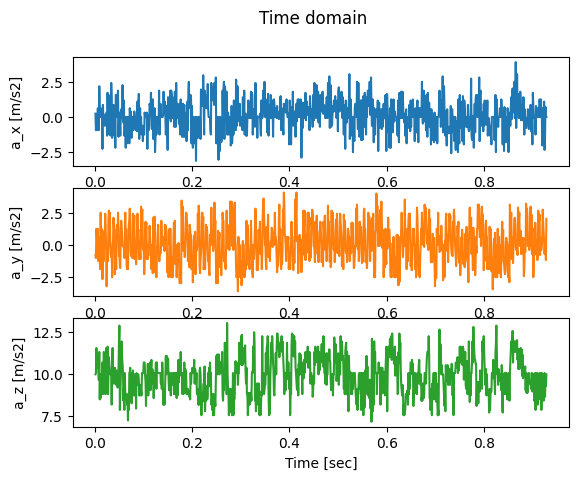

In [3]:
#Insert the block of code for calculating time-domain features:
#Print out all time domain features in this block
#
from pandas.core.internals.construction import dict_to_mgr

filename2 = '20260204_162958_lab2_fan_normal.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations
#Declaring arrays
dt = [] # sampling period list, dt
t = [] # time list, t
a_x = [] # x-axis acceleration list, a_x
a_y = [] # y-axis acceleration list, a_y
a_z = [] # z-axis acceleration list, a_z

# Reading a CSV file and convert rows as data

with open(filename2, 'r') as f:
    rows = csv.reader(f, delimiter = ',')
    header = next(rows)
    for row in rows:
        dt.append(float(row[0]))
        t.append(float(row[1]))
        a_x.append(float(row[2]))
        a_y.append(float(row[3]))
        a_z.append(float(row[4]))

N = int(len(dt)) # Number of sample = 1000
T = t[-1]/N # sampling period, assumed equally distributed


n = np.array(range(len(dt))) + 1 # measured sequence
dt = np.array(dt) # convert dt list to dt 1D array
t = np.array(t) # convert t list to t 1D array
a_x = np.array(a_x) # convert a_x list to a_x 1D array
a_y = np.array(a_y) # convert a_y list to a_y 1D array
a_z = np.array(a_z) # convert a_z list to a_z 1D array


fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')




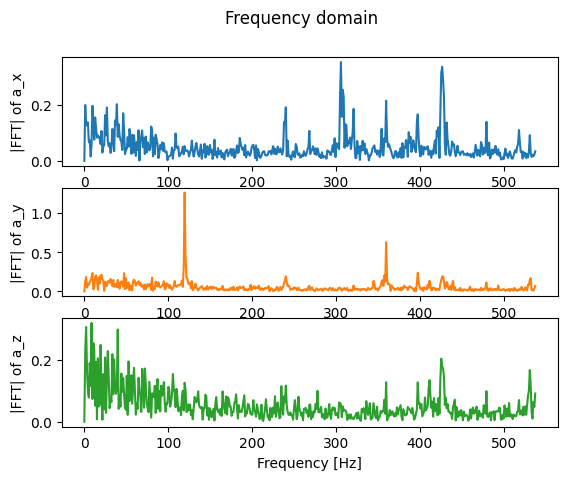

In [4]:
#Insert the block of code for processing and plotting here:
#
from scipy.fft import fft, fftfreq

# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()
#
normal = {
    "t": t.copy(),
    "a_x": a_x.copy(),
    "a_y": a_y.copy(),
    "a_z": a_z.copy(),
    "f_x": f_x.copy(),
    "y_x": y_x.copy(),
    "f_y": f_y.copy(),
    "y_y": y_y.copy(),
    "f_z": f_z.copy(),
    "y_z": y_z.copy()
}


#

## 3.3 Signal Processing and plotting data from: Fan anomalous condition data

Reuse the code above to process the data and plot the signal for fan data in normal conditions.

HINT: Do not use the same variables names from code above. You will need all data information stored in different variables for Section 3.4

In [12]:
#Insert the block of code to upload the csv file here:
#
#This code allows you to upload a file from your local drive
from google.colab import files
uploaded_3 = files.upload()
#If you will work with excel, please save your file with a .CSV format
#Check the output file name below. You will use that file name in the next block.
#

Saving 20260204_162922_lab2_fan_abnormal.csv to 20260204_162922_lab2_fan_abnormal.csv


Text(0.5, 0, 'Time [sec]')

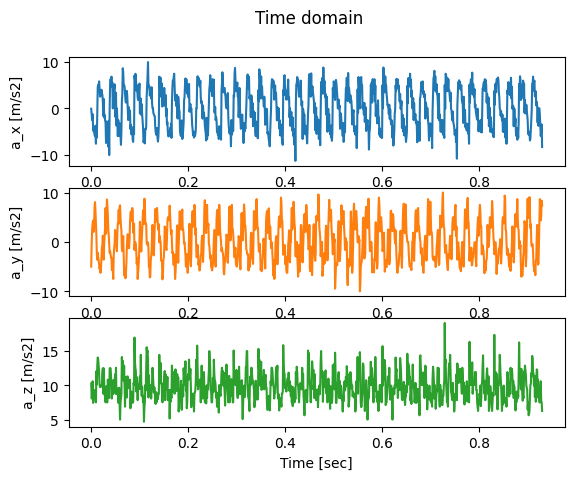

In [5]:
#Insert the block of code for calculating time-domain features:
#Print out all time domain features in this block
#
from pandas.core.internals.construction import dict_to_mgr

filename3 = '20260204_162922_lab2_fan_abnormal.csv' #Insert the imported csv file name (copy the bolded text from the previous output) from the previous step inside the quotations
#Declaring arrays
dt = [] # sampling period list, dt
t = [] # time list, t
a_x = [] # x-axis acceleration list, a_x
a_y = [] # y-axis acceleration list, a_y
a_z = [] # z-axis acceleration list, a_z

# Reading a CSV file and convert rows as data

with open(filename3, 'r') as f:
    rows = csv.reader(f, delimiter = ',')
    header = next(rows)
    for row in rows:
        dt.append(float(row[0]))
        t.append(float(row[1]))
        a_x.append(float(row[2]))
        a_y.append(float(row[3]))
        a_z.append(float(row[4]))

N = int(len(dt)) # Number of sample = 1000
T = t[-1]/N # sampling period, assumed equally distributed


n = np.array(range(len(dt))) + 1 # measured sequence
dt = np.array(dt) # convert dt list to dt 1D array
t = np.array(t) # convert t list to t 1D array
a_x = np.array(a_x) # convert a_x list to a_x 1D array
a_y = np.array(a_y) # convert a_y list to a_y 1D array
a_z = np.array(a_z) # convert a_z list to a_z 1D array


fig1, ax1 = plt.subplots(3)
fig1.suptitle('Time domain')
ax1[0].plot(t,a_x,'tab:blue')
ax1[0].set_ylabel('a_x [m/s2]')
ax1[1].plot(t,a_y, 'tab:orange')
ax1[1].set_ylabel('a_y [m/s2]')
ax1[2].plot(t,a_z, 'tab:green')
ax1[2].set_ylabel('a_z [m/s2]')
ax1[2].set_xlabel('Time [sec]')




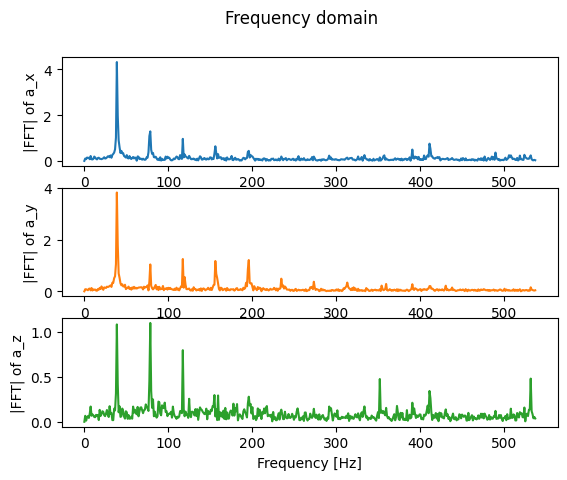

In [6]:
#Insert the block of code for processing and plotting here:
#
from scipy.fft import fft, fftfreq

# get_fft is a function to calculate FFT
# arguments are x(signal array), T(sampling period), N(number of Samples)
# returns are f(frequency array) and y_mag(FFT magnitude array)
def get_fft(x, T, N):
    f = fftfreq(N, T)[:N//2]
    y_mag = 2/N * np.abs(fft(x)[:N//2])
    y_mag[0] = 0
    return f, y_mag


f_x, y_x = get_fft(a_x, T, N)
f_y, y_y = get_fft(a_y, T, N)
f_z, y_z = get_fft(a_z, T, N)

fig2, ax2 = plt.subplots(3)
fig2.suptitle('Frequency domain')
ax2[0].plot(f_x,y_x,'tab:blue')
ax2[0].set_ylabel('|FFT| of a_x')
ax2[1].plot(f_y,y_y,'tab:orange')
ax2[1].set_ylabel('|FFT| of a_y')
ax2[2].plot(f_z,y_z,'tab:green')
ax2[2].set_ylabel('|FFT| of a_z')
ax2[2].set_xlabel('Frequency [Hz]')

plt.show()
#
anom = {
    "t": t.copy(),
    "a_x": a_x.copy(),
    "a_y": a_y.copy(),
    "a_z": a_z.copy(),
    "f_x": f_x.copy(),
    "y_x": y_x.copy(),
    "f_y": f_y.copy(),
    "y_y": y_y.copy(),
    "f_z": f_z.copy(),
    "y_z": y_z.copy()
}


#

## 3.4 Contrasting time and frequency domain plots between datasets: Normal vs Anomalous

#### TASK 3.4

You will use the data you have worked through this Colab notebook. No need to re-run all codes.
1.	Make a comparative figure between the time-domain graphs on normal and anomalous data.

       * Column 1: Normal data, Column 2: Anomalous data

       * Row 1: a_x, Row 2: a_y, Row 3: a_z

2. Repeat 1. Make a comparative figure between the frequency-domain graphs on normal and anomalous data.
2.	Add your name at the end of the tile of each plot (e.g., ‘Time domain, John Doe’)


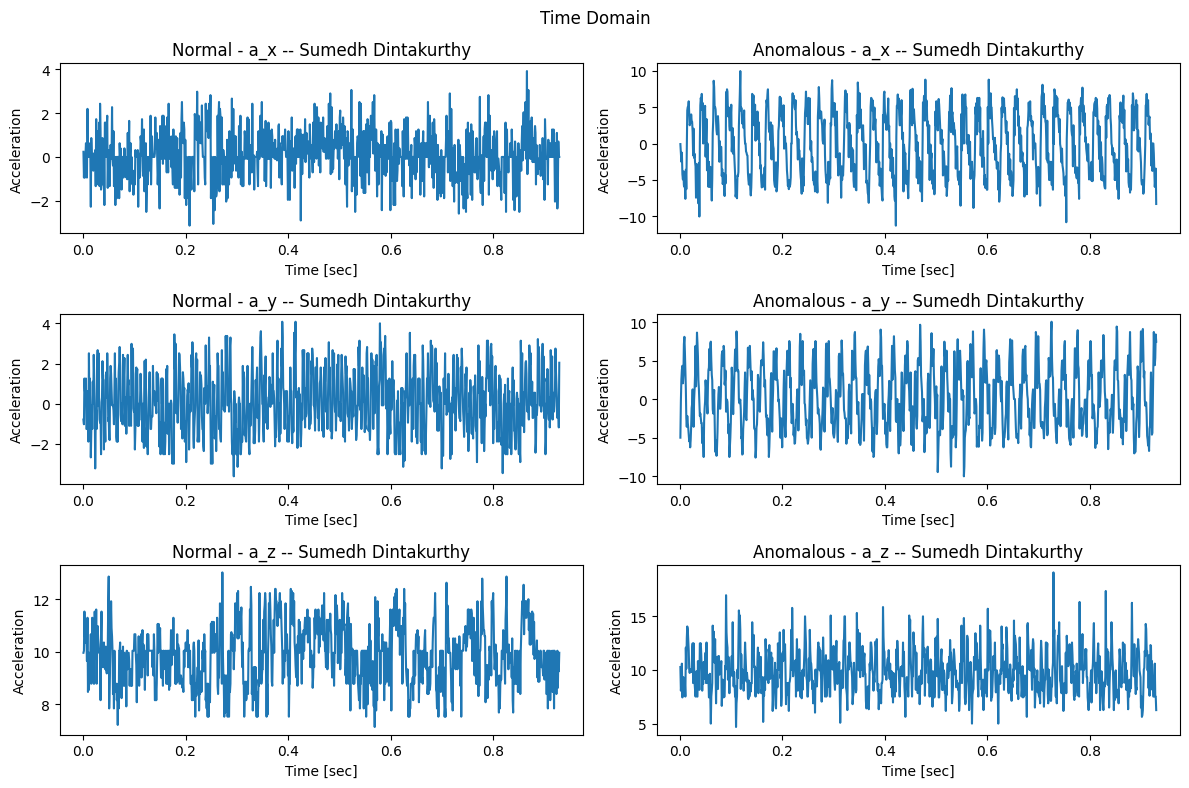

In [7]:
#Insert your code here:
#Provide comments to describe your code
#
fig_time, ax_time = plt.subplots(3, 2, figsize=(12, 8))
fig_time.suptitle('Time Domain')

signals = ["a_x", "a_y", "a_z"]

for i, sig in enumerate(signals):
    ax_time[i, 0].plot(normal["t"], normal[sig])
    ax_time[i, 0].set_title(f'Normal - {sig} -- Sumedh Dintakurthy')

    ax_time[i, 1].plot(anom["t"], anom[sig])
    ax_time[i, 1].set_title(f'Anomalous - {sig} -- Sumedh Dintakurthy')

    ax_time[i, 0].set_xlabel('Time [sec]')
    ax_time[i, 1].set_xlabel('Time [sec]')
    ax_time[i, 0].set_ylabel('Acceleration')
    ax_time[i, 1].set_ylabel('Acceleration')

plt.tight_layout()
plt.show()

#

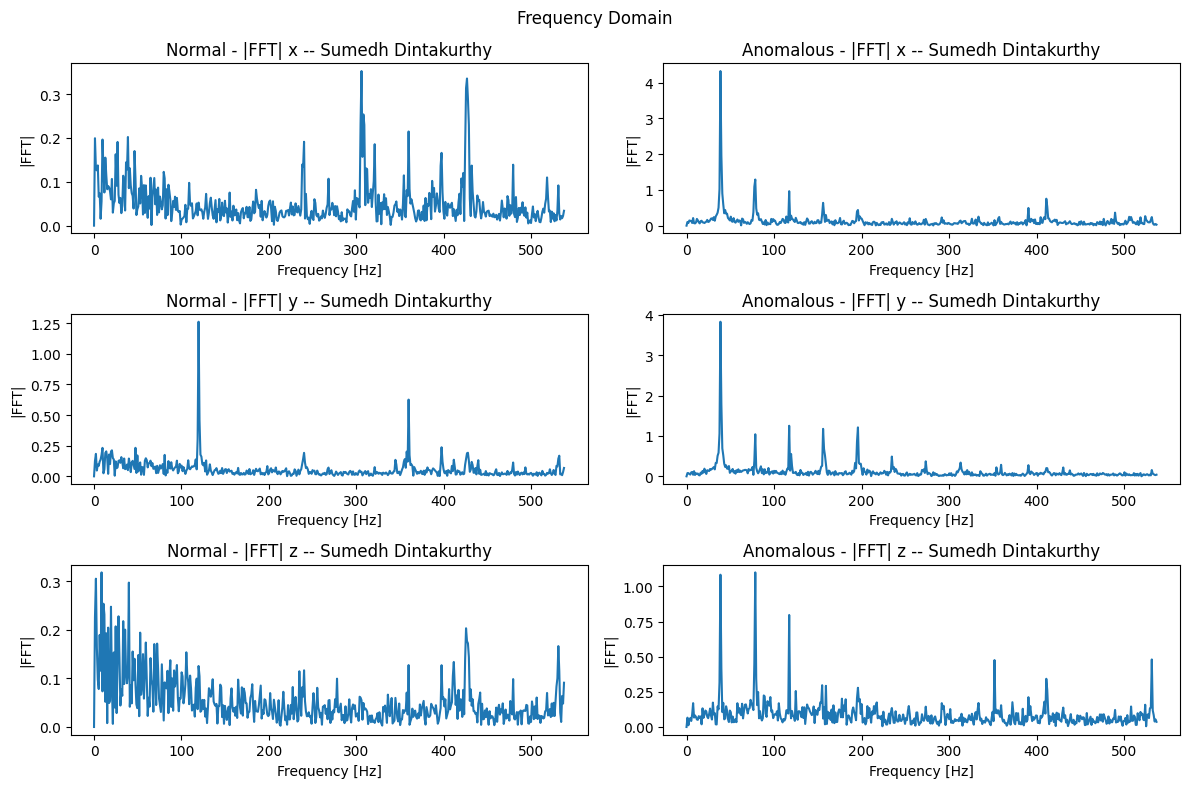

In [8]:
# Insert your code here:
# Provide comments to describe your code

fig_freq, ax_freq = plt.subplots(3, 2, figsize=(12, 8))
fig_freq.suptitle('Frequency Domain')

freq_signals = [("f_x", "y_x"),
                ("f_y", "y_y"),
                ("f_z", "y_z")]

for i, (f_key, y_key) in enumerate(freq_signals):

    # Plot Normal frequency domain
    ax_freq[i, 0].plot(normal[f_key], normal[y_key])
    ax_freq[i, 0].set_title(f'Normal - |FFT| {f_key[-1]} -- Sumedh Dintakurthy')

    # Plot Anomalous frequency domain
    ax_freq[i, 1].plot(anom[f_key], anom[y_key])
    ax_freq[i, 1].set_title(f'Anomalous - |FFT| {f_key[-1]} -- Sumedh Dintakurthy')

    # Axis labels
    ax_freq[i, 0].set_xlabel('Frequency [Hz]')
    ax_freq[i, 1].set_xlabel('Frequency [Hz]')
    ax_freq[i, 0].set_ylabel('|FFT|')
    ax_freq[i, 1].set_ylabel('|FFT|')

plt.tight_layout()
plt.show()



### Compare data of two conditions (normal vs. anomalous) of the axial flow fan.
  



#### 1) What contrast could be made between comparing time-domain characteristics of normal vs anomalous condition data?
---

Wirte down answer here.
The amplitude of the vibration is significantly higher in the abnormal fan condition

---

#### 2) What are the main frequencies and FFT magnitudes of each measurement?
---

Wirte down answer here.
Normal Fan
x - Main Frequency = 300 Hz; FFT = 0.35
y - Main Frequency = 110 Hz; FFT = 1.25
z - Main Frequency = 10 Hz; FFT = 0.3
Abnormal Fan
x - Main Frequency = 50 Hz; FFT = 4.2
y - Main Frequency = 50 Hz; FFT = 3.9
z - Main Frequency = 40 Hz; FFT = 1.2

---

#### 3) Which domain features are better to detect the abnormal condition of the fan? Explain why.
---

Wirte down answer here.
The Frequency domain. As it shows the abnormalities with a clear dominant peak and with much larger FFT magnitudes, it is easier to compare
---

#### 4) From the three measured dimensions, Which dimension shows the best salient feature in order to detect vibration? Explain why.
---

Wirte down answer here.
The x-axis. I think it is because the putty mainly hindered the vibration of the fan along x-axis.
---

## Lab2 Summary and Deliverables

Answer the following questions for your achievements




### Q1. Please summarize Lab2.

---

Write down A1 here.
We tested the vibrations of a fan, using an accelerometer. We first measured the vibrations of the normal fan, and then hindered the motion of the fan using a putty, and captured the vibrations again. And then, we compared the vibrations across time and frequency domains.
---


### Q2. What skills did you have to develop to accomplish this project?

---

Write down A2 here.
FFT in python. Using an accelerometer. Pandas and NumPy
---

### Q3. What aspects of this project were the most beneficial for your learning?

---

Write down A3 here.
Eveything. It is a good hands on project to learn how to capture and analyze data.

---

### Q4. What challenges did you encounter in completing the project?

---

Write down A4 here.
The results were absolutely the same, even though i uploaded the correct csv files everywhere.
---

### Q5. How did you overcome the challenges or remedy the problems encountered?

---

Write down A5 here.
I had to restart the session at runtime, for colab to give me the correct readings
---

<br></br>

Get back to [Lab Index Page](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/index.ipynb)